Welcome to this comprehensive notebook where we will be diving deep into the world of Airbnb listings in Los Angeles, one of the most vibrant and sought-after travel destinations in the world. With its diverse neighborhoods, rich culture, and stunning landscapes, Los Angeles attracts millions of visitors each year. This makes it a thriving marketplace for Airbnb hosts, who offer a wide range of accommodations to meet the needs of every traveler.

## Import data and required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/airbnb-2023/airbnb_los_angeles_listings_summary.csv')
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,930487087555321292,Home in La Puente · ★New · 1 bedroom · 1 bed ·...,482579539,Yahide,Unincorporated Areas,Rowland Heights,33.979625,-117.880993,Private room,35,1,0,NaN,NaN,9,0,0,NaN
1,906882865272179753,Home in Bell · 1 bedroom · 1 bed · 2 baths,390414536,Paulo,Other Cities,Bell,33.981930,-118.200480,Private room,80,1,0,NaN,NaN,91,364,0,NaN
2,942342470598573002,Home in Rowland Heights · ★New · 1 bedroom · 2...,495867643,Lin,Unincorporated Areas,Rowland Heights,33.978508,-117.898650,Private room,69,1,0,NaN,NaN,4,359,0,NaN


## Exploring and cleaning the data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44594 entries, 0 to 44593
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              44594 non-null  int64  
 1   name                            44594 non-null  object 
 2   host_id                         44594 non-null  int64  
 3   host_name                       44592 non-null  object 
 4   neighbourhood_group             44594 non-null  object 
 5   neighbourhood                   44594 non-null  object 
 6   latitude                        44594 non-null  float64
 7   longitude                       44594 non-null  float64
 8   room_type                       44594 non-null  object 
 9   price                           44594 non-null  int64  
 10  minimum_nights                  44594 non-null  int64  
 11  number_of_reviews               44594 non-null  int64  
 12  last_review                     

In [3]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             2
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       11632
reviews_per_month                 11632
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           33042
dtype: int64

In [4]:
df.dropna(subset='host_name', inplace=True)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,44592.0,3.609047e+17,4.052305e+17,109.00000,2.902770e+07,5.219489e+07,7.851327e+17,9.723986e+17
host_id,44592.0,1.770644e+08,1.732010e+08,521.00000,2.513831e+07,1.074344e+08,3.217603e+08,5.349876e+08
latitude,44592.0,3.405374e+01,1.380349e-01,33.33854,3.399809e+01,3.406050e+01,3.410636e+01,3.481118e+01
longitude,44592.0,-1.183146e+02,1.713313e-01,-118.91641,-1.184128e+02,-1.183448e+02,-1.182397e+02,-1.176534e+02
price,44592.0,2.918601e+02,9.345570e+02,7.00000,9.100000e+01,1.500000e+02,2.520000e+02,9.999900e+04
minimum_nights,44592.0,1.772789e+01,2.866230e+01,1.00000,2.000000e+00,7.000000e+00,3.000000e+01,1.124000e+03
number_of_reviews,44592.0,3.437664e+01,7.563464e+01,0.00000,0.000000e+00,5.000000e+00,3.100000e+01,2.472000e+03
reviews_per_month,32961.0,1.509095e+00,1.777520e+00,0.01000,2.300000e-01,8.300000e-01,2.300000e+00,5.849000e+01
calculated_host_listings_count,44592.0,2.309177e+01,8.829175e+01,1.00000,1.000000e+00,2.000000e+00,1.000000e+01,6.920000e+02
availability_365,44592.0,1.956233e+02,1.376969e+02,0.00000,6.600000e+01,1.910000e+02,3.390000e+02,3.650000e+02


### Outliers

In [6]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Q1 = {Q1} --- Q3 = {Q3} --- IQR = {IQR}\n\n'
      f'Lower bound = {lower_bound} --- Upper bound = {upper_bound}')

Q1 = 91.0 --- Q3 = 252.0 --- IQR = 161.0

Lower bound = -150.5 --- Upper bound = 493.5


In [7]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Print or analyze the outliers
print("Outliers:")
print(outliers.shape)

Outliers:
(4624, 18)


In [8]:
df = df[(df['price'] < int(upper_bound)) & (df['price'] > int(lower_bound)) & (df['availability_365'] > 0)]
print(df.shape)

(33253, 18)


## Add new feature

To compare the potential income, I added the expected income column to the dataframe from the product of the price and the number of available days during the year.

In [9]:
df['income'] = df['price'] * df['availability_365']

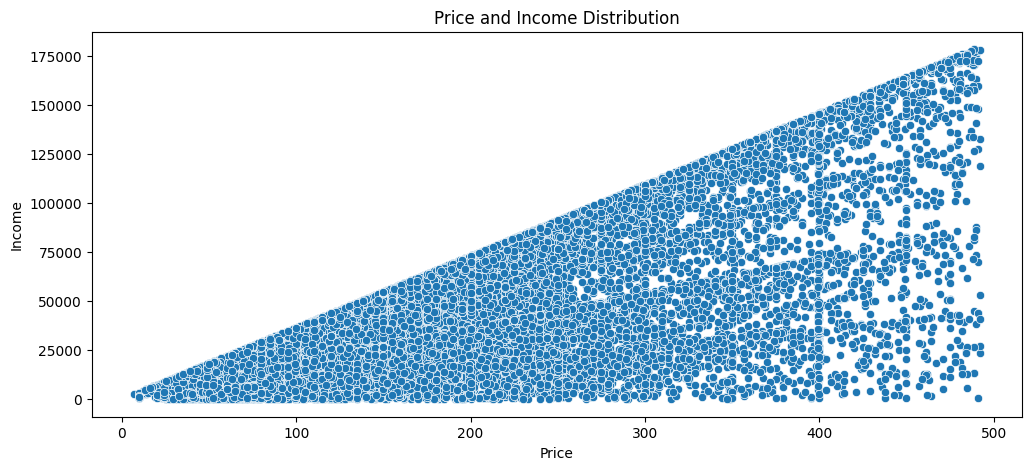

In [10]:
plt.figure(figsize=(12, 5))
plt.title('Price and Income Distribution')

sns.scatterplot(df, x='price', y='income')

plt.xlabel('Price')
plt.ylabel('Income')
plt.show()

## General information

In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,33253.0,NaN,NaN,NaN,408566879835657408.0,408217344451446144.0,109.0,36078044.0,558884749915698048.0,815213880683659520.0,972398639579333888.0
name,33253,18458,Rental unit in Los Angeles · 1 bedroom · 1 bed...,894,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,33253.0,NaN,NaN,NaN,188360332.258413,178347217.038598,521.0,27277399.0,117650729.0,360555949.0,534987552.0
host_name,33253,6455,Blueground,614,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group,33253,3,City of Los Angeles,15867,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,33253,263,Long Beach,1439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,33253.0,NaN,NaN,NaN,34.053182,0.140686,33.33854,33.9957,34.05954,34.10544,34.811183
longitude,33253.0,NaN,NaN,NaN,-118.303453,0.16896,-118.90766,-118.40153,-118.339058,-118.21498,-117.65336
room_type,33253,4,Entire home/apt,24829,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,33253.0,NaN,NaN,NaN,166.252609,98.997311,7.0,92.0,145.0,216.0,492.0


| Title | Value |
| --- | --- |
| Rental Items | 33253 |
| Hosts | 6455 |
| Neibourhoods | 263 |
| Min Price | &#36;7 |
| Max Price | &#36;464 |
| Avg Price | &#36;166.25 |
| Min Income | &#36;25 |
| Max Income | &#36;178485 |
| Avg Income | &#36;38580.85 |

## Hosts with the highest expected income

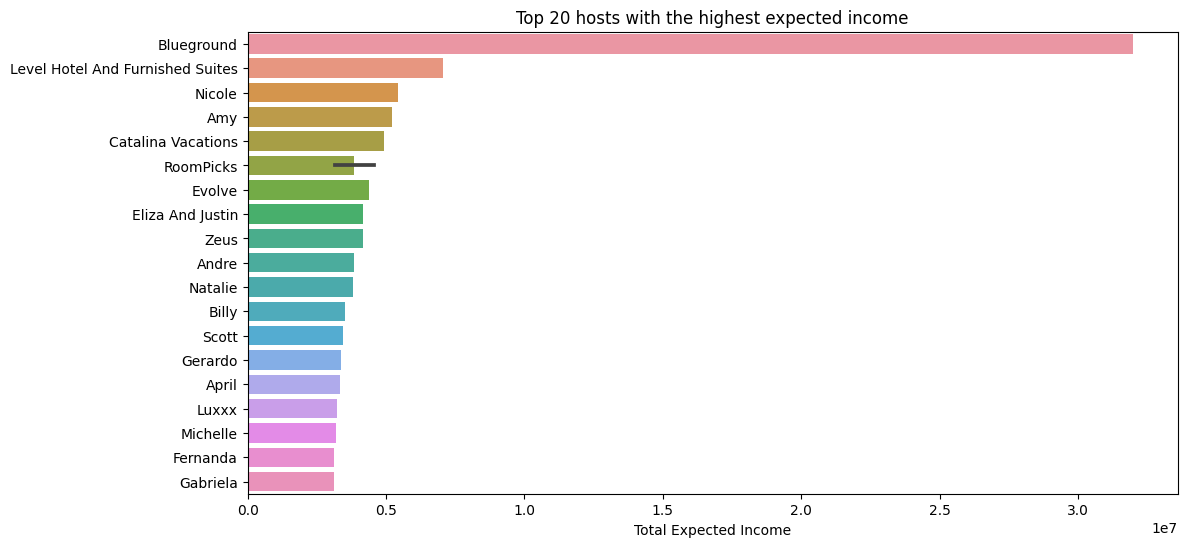

In [12]:
df1 = df.groupby(['host_name', 'host_id'])['income'].sum().reset_index(name='total income').sort_values(by='total income', ascending=False)

plt.figure(figsize=(12, 6))
plt.title('Top 20 hosts with the highest expected income')

sns.barplot(df1.head(20), x='total income', y='host_name')

plt.xlabel('Total Expected Income')
plt.ylabel('')
plt.show()

## Neighborhoods with the most rental items

Rental items are categorized into three groups. In the picture below, you can see the number of rental items in each group.

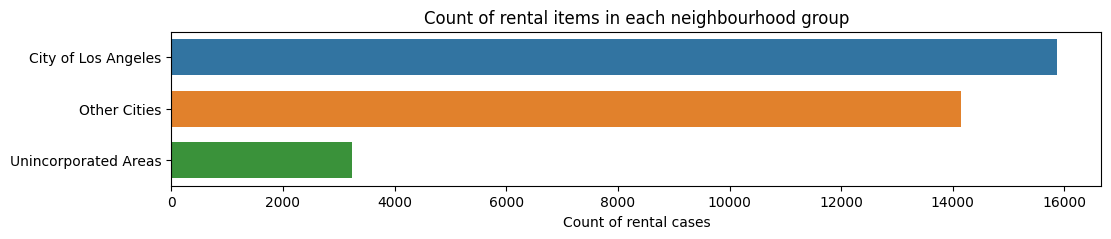

In [13]:
df2 = df.groupby('neighbourhood_group').size().reset_index(name='count').sort_values(by='count', ascending=False)


plt.figure(figsize=(12, 2))
plt.title('Count of rental items in each neighbourhood group')

sns.barplot(df2, x='count', y='neighbourhood_group', width=0.7)

plt.xlabel('Count of rental cases')
plt.ylabel('')
plt.show()

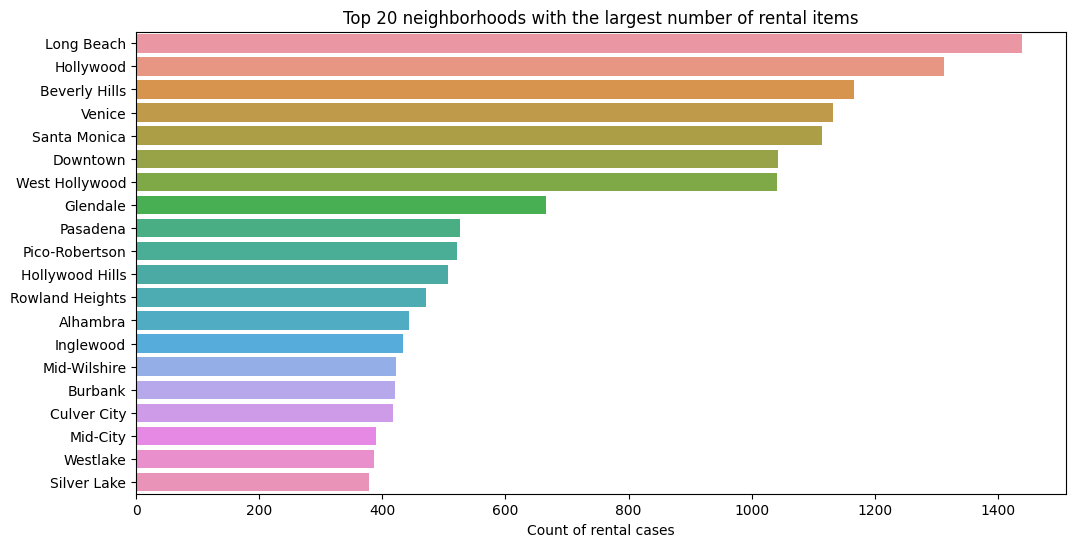

In [14]:
df3 = df.groupby('neighbourhood').size().reset_index(name='count'). sort_values('count', ascending=False)

plt.figure(figsize=(12, 6))
plt.title('Top 20 neighborhoods with the largest number of rental items')

sns.barplot(df3.head(20), x='count', y='neighbourhood')

plt.xlabel('Count of rental cases')
plt.ylabel('')
plt.show()

## Neighborhoods with the highest average price

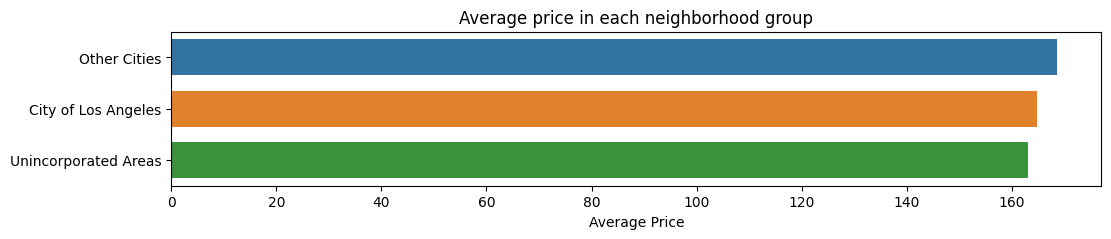

In [15]:
df4 = df.groupby('neighbourhood_group')['price'].mean().reset_index().sort_values(by='price', ascending=False)

plt.figure(figsize=(12, 2))
plt.title('Average price in each neighborhood group')

sns.barplot(df4, x='price', y='neighbourhood_group', width=0.7)

plt.xlabel('Average Price')
plt.ylabel('')
plt.show()

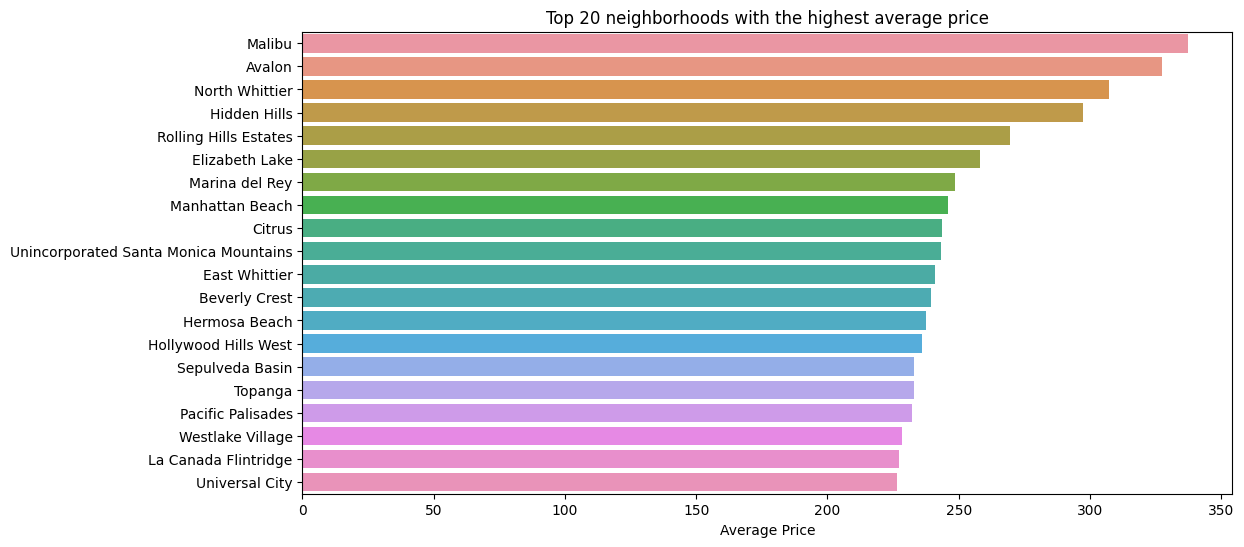

In [16]:
df5 = df.groupby('neighbourhood')['price'].mean().reset_index().sort_values(by='price', ascending=False)

plt.figure(figsize=(12, 6))
plt.title('Top 20 neighborhoods with the highest average price')

sns.barplot(df5.head(20), x='price', y='neighbourhood')

plt.xlabel('Average Price')
plt.ylabel('')
plt.show()

## Neighborhoods with the highest expected income

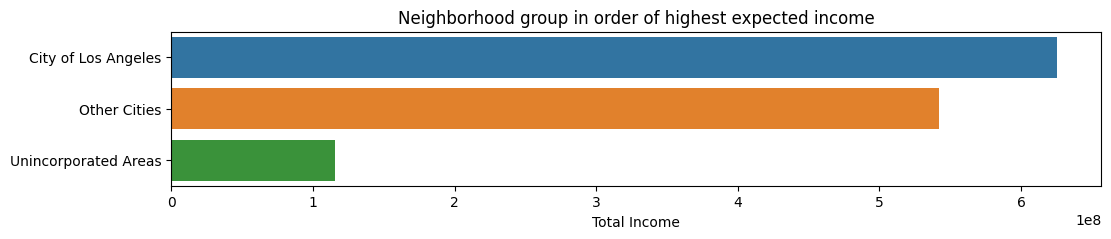

In [17]:
df6 = df.groupby('neighbourhood_group')['income'].sum().reset_index(name='total income').sort_values(by='total income', ascending=False)

plt.figure(figsize=(12,2))
plt.title('Neighborhood group in order of highest expected income')

sns.barplot(df6, x='total income', y='neighbourhood_group')

plt.xlabel('Total Income')
plt.ylabel('')
plt.show()

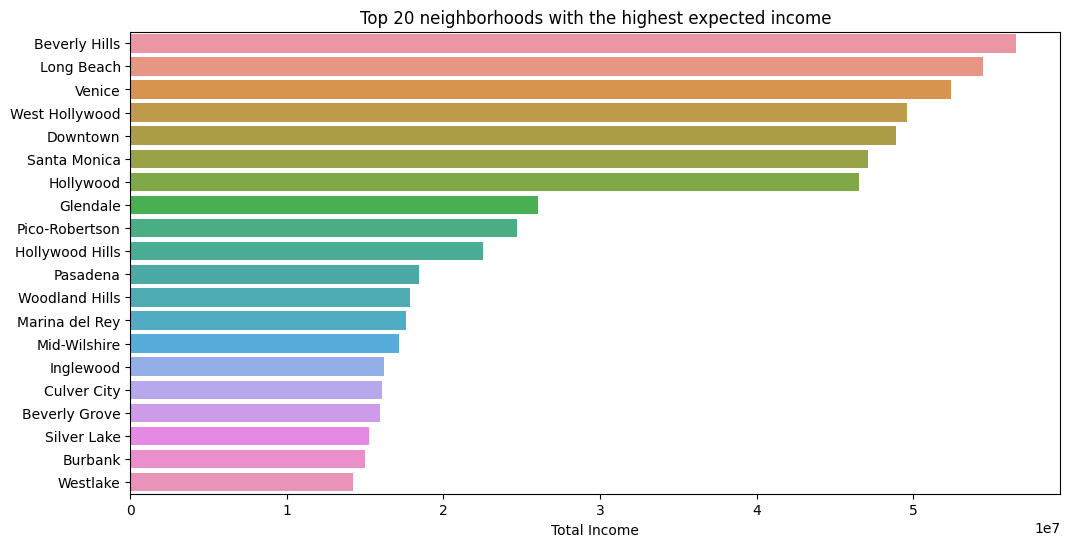

In [18]:
df7 = df.groupby('neighbourhood')['income'].sum().reset_index(name='total income').sort_values(by='total income', ascending=False)

plt.figure(figsize=(12, 6))
plt.title('Top 20 neighborhoods with the highest expected income')

sns.barplot(df7.head(20), x='total income', y='neighbourhood')

plt.xlabel('Total Income')
plt.ylabel('')
plt.show()